# EDA on Facebook's Data

## Problem Statement

Facebook has become quite popular in the recent few years with people all over the world using it as a medium to share their status,thoughts and pictures with their friends. With the mobile app , it has become even more popular and easier to access. People from all age groups are connected to facebook, however there are certain differences in their way of using it such as with respect to initiating friendships and sending likes . We are trying to study the dataset provided to identify certain patterns with respect to how the users are making use of this most popular social networking app depending on their age group,gender etc.

In [2]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      
pd.set_option('display.max_colwidth', -1)           
pd.options.display.max_columns = 50                 

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

## Importing DataSet

In [4]:
facebook_df = pd.read_csv("https://github.com/insaid2018/Term-1/raw/master/Data/Projects/facebook_data.csv")
facebook_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


#### Removing unnecessary columns

In [5]:
facebook_df.drop(['userid', 'dob_day', 'dob_month', 'dob_year', 'tenure'], 1, inplace=True)

#### Removing rows which has missing gender values

In [ ]:
facebook_df.dropna(subset=['gender'], inplace=True)

#### Removing users with no friends as they mostly won't get posts on their timeline to like

In [6]:
facebook_df.drop(facebook_df[facebook_df['friend_count'] == 0].index, inplace = True)

#### Removing 5 percent outliers who have got likes and friend_count much more than others as they might be very famous personality or streamers or so on....

In [7]:
facebook_df.drop(facebook_df[facebook_df['likes'].values > facebook_df['likes'].quantile([0.95]).values].index, inplace = True)
facebook_df.drop(facebook_df[facebook_df['friend_count'].values > facebook_df['friend_count'].quantile([0.95]).values].index, inplace = True)

#### we have few records where they have received huge no of likes although they dont have many friends. Probably their post went viral. Removing 1% of such outliers


In [8]:
facebook_df.drop(facebook_df[facebook_df['likes_received'].values > facebook_df['likes_received'].quantile([0.99]).values].index, inplace = True)

## Exploratory Data Analysis


### Users on Facebook by gender:

Text(0.5, 1.0, 'Pie chart showing the proportion of each gender value')

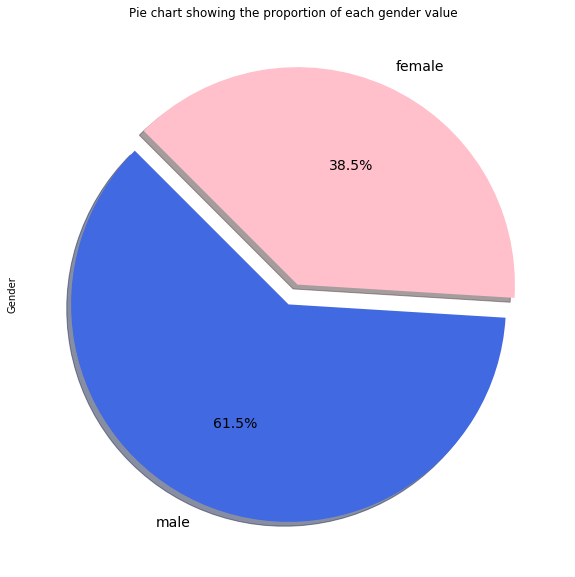

In [9]:
facebook_df['gender'].value_counts().plot(kind='pie', explode=[0.05,0.05], colors = ['royalblue','pink'], fontsize=14, autopct='%1.1f%%',
                                               figsize=(10,10), shadow=True, startangle=135)

plt.ylabel('Gender')
plt.title('Pie chart showing the proportion of each gender value')

### Users on Facebook by Age:

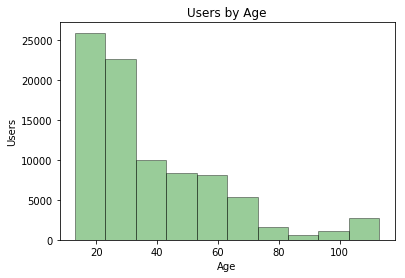

In [10]:
sns.distplot(facebook_df['age'], hist=True, kde=False,
             bins=10, color = 'green',
             hist_kws={'edgecolor':'black'})
plt.title('Users by Age')
plt.xlabel('Age')
plt.ylabel('Users')

### Likes by gender

<Figure size 1440x720 with 0 Axes>

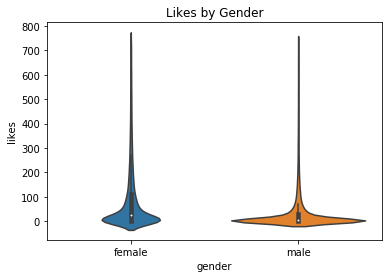

<Figure size 1440x720 with 0 Axes>

In [17]:
sns.violinplot(x = 'gender', y = 'likes', data = facebook_df )
plt.title('Likes by Gender')

### Likes received by gender

Text(0.5, 1.0, 'Likes received by Gender')

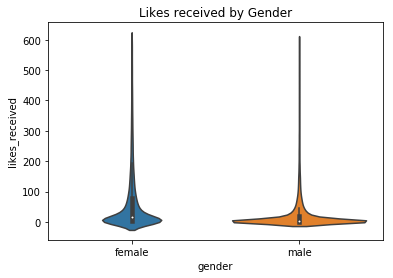

In [12]:
sns.violinplot(x = 'gender', y = 'likes_received', data = facebook_df )
plt.title('Likes received by Gender')

### Friends count and friendship initiated by Gender

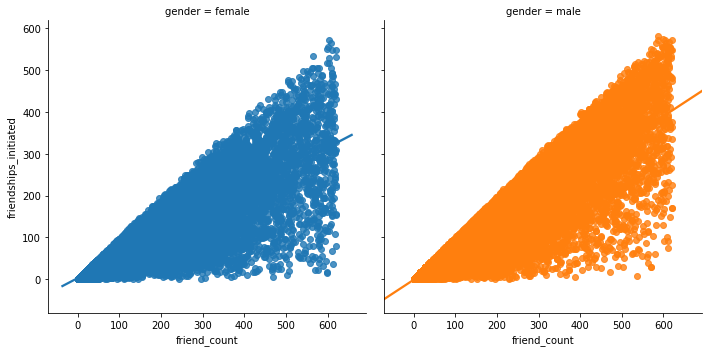

In [14]:
sns.lmplot(x = 'friend_count', y = 'friendships_initiated', data = facebook_df, hue = 'gender', col = 'gender')

### Friends count by Age

Text(0.5, 1.0, 'Friend count by Age')

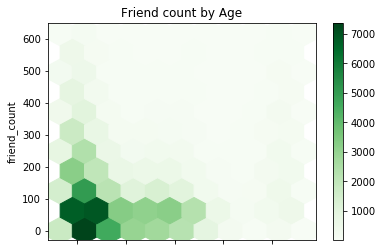

In [15]:
facebook_df.plot.hexbin(x='age', y='friend_count', gridsize=10, cmap=plt.cm.Greens)
plt.title('Friend count by Age')

### Friendship initiated by Age


Text(0.5, 1.0, 'Friendship initiated by Age')

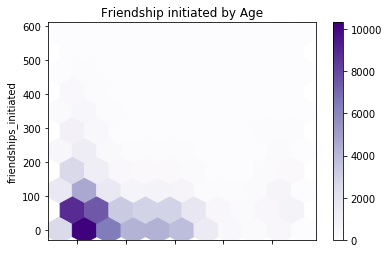

In [18]:
facebook_df.plot.hexbin(x='age', y='friendships_initiated', gridsize=10, cmap=plt.cm.Purples)
plt.title('Friendship initiated by Age')

### Likes by Age


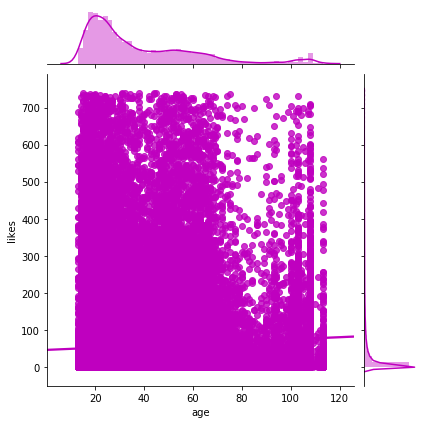

In [20]:
sns.jointplot(kind="reg",x="age", y="likes", data=facebook_df, color="m")

### Likes received by Age

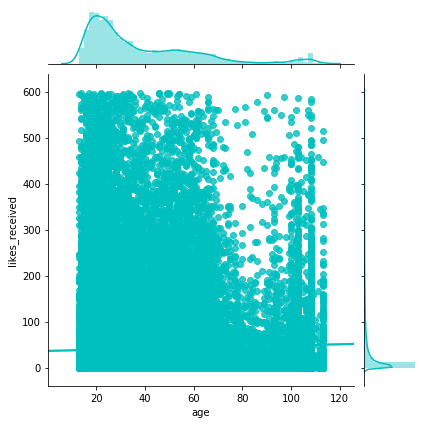

In [21]:
sns.jointplot(kind="reg", x="age", y="likes_received", data=facebook_df, color="c")

### Likes from mobile and web 

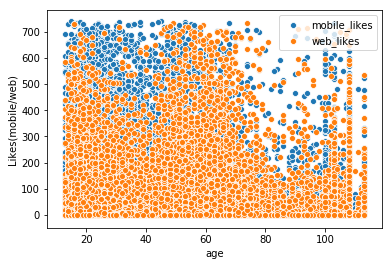

In [22]:
sns.scatterplot(x="age", y="mobile_likes", data=facebook_df)
sns.scatterplot(x="age", y="www_likes", data=facebook_df)
plt.ylabel('Likes(mobile/web)')
plt.legend(labels=['mobile_likes', 'web_likes'])

### Likes received from mobile and web 

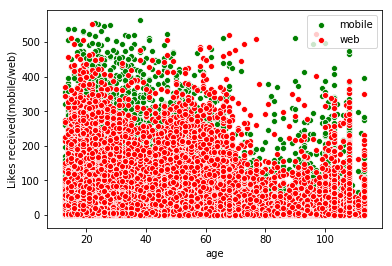

In [23]:
sns.scatterplot(x="age", y="mobile_likes_received", data=facebook_df, color='green')
sns.scatterplot(x="age", y="www_likes_received", data=facebook_df, color='red')
plt.ylabel('Likes received(mobile/web)')
plt.legend(labels=['mobile', 'web'])

## Conclusion

- It is analyzed that there are more male than female on facebook
- Female gets more likes than Male
- Male have more friends and they have initiated more friend requests
- Users with age below 30 are more on facebook than older ones
- young people have more friends and they have initiated more friendships
- young people gets more likes and they like more than older ones
- People do more likes and gets more likes from mobiles than web

## Actionable Insights

- More people prefer to use mobile than web so facebook should do more investment in mobile related stuffs than web
- Things should be more centric to younger ones as their presense is far more than older ones